In [1]:
stname='smalldata/stations_locations_times_39.txt'

In [2]:
f = open(stname,'r');
lines=f.readlines();
print(lines)

['-104.03412 31.93553 9.67058467742\n', '-103.8458 31.5542 7.26633602151\n', '-104.301444 31.774145 15.921\n', '-103.86697 31.37045 10.772687052\n', '-103.66793 31.57935 12.9183947133\n', '-104.50077 31.66864 11.1308938172\n', '-104.514453 31.75299 10.9986653226\n', '-103.9577 31.2133 12.1441532258\n', '-103.754585 31.283607 15.4345878136\n', '-103.510147 31.408922 13.134311828\n', '-103.78112 30.94367 19.5108207885\n', '-103.21825 31.6472 17.924516129\n', '-103.3227 31.2804 18.6044601254\n', '-103.2694 31.18697 19.0081312724\n', '-103.252 31.12496 20.431140233\n', '-103.099701 31.303087 20.4052508961\n', '-103.06216 31.341918 19.5493391577\n', '-103.3247 30.91978 24.5249546371\n', '-104.98515 30.7866 25.3761102151\n', '-102.76141 31.34023 24.6987197581\n', '-103.63852 30.37448 27.6922150538\n', '-102.90736 30.89174 26.9816572581\n', '-102.54913 32.12009 26.7092600806\n', '-102.25277 32.00061 31.0355129928\n', '-102.037907 31.19806 34.7853046595\n', '-101.7999756 31.9779827 37.13755152

In [3]:
len(lines)

39

In [4]:
lons=[]
lats=[]
times=[]
for iline,line in enumerate(lines):
    line=line.rstrip("\n").split(" ")
    print(iline,line)
    lons.append(float(line[0]))
    lats.append(float(line[1]))
    times.append(float(line[2]))

0 ['-104.03412', '31.93553', '9.67058467742']
1 ['-103.8458', '31.5542', '7.26633602151']
2 ['-104.301444', '31.774145', '15.921']
3 ['-103.86697', '31.37045', '10.772687052']
4 ['-103.66793', '31.57935', '12.9183947133']
5 ['-104.50077', '31.66864', '11.1308938172']
6 ['-104.514453', '31.75299', '10.9986653226']
7 ['-103.9577', '31.2133', '12.1441532258']
8 ['-103.754585', '31.283607', '15.4345878136']
9 ['-103.510147', '31.408922', '13.134311828']
10 ['-103.78112', '30.94367', '19.5108207885']
11 ['-103.21825', '31.6472', '17.924516129']
12 ['-103.3227', '31.2804', '18.6044601254']
13 ['-103.2694', '31.18697', '19.0081312724']
14 ['-103.252', '31.12496', '20.431140233']
15 ['-103.099701', '31.303087', '20.4052508961']
16 ['-103.06216', '31.341918', '19.5493391577']
17 ['-103.3247', '30.91978', '24.5249546371']
18 ['-104.98515', '30.7866', '25.3761102151']
19 ['-102.76141', '31.34023', '24.6987197581']
20 ['-103.63852', '30.37448', '27.6922150538']
21 ['-102.90736', '30.89174', '26.98

In [5]:
# number of stations in the area of interest
nsta=9

In [6]:
lons=lons[0:nsta]
lats=lats[0:nsta]
times=times[0:nsta]
minlon=min(lons)
maxlon=max(lons)
minlat=min(lats)
maxlat=max(lats)
print('minlon,maxlon:',minlon,maxlon)
print('minlat,maxlat:',minlat,maxlat)
#In Cartesian coordinates
minx=0;miny=0;
maxx=(maxlon-minlon)*111.1949
maxy=(maxlat-minlat)*111.1949
print('minx,maxx:',minx,maxx)
print('miny,maxy:',miny,maxy)

minlon,maxlon: -104.514453 -103.66793
minlat,maxlat: 31.2133 31.93553
minx,maxx: 0 94.12904033270054
miny,maxy: 0 80.30829262699997


In [7]:
import matplotlib.pyplot as plt
# Catalog location: longitude=-104.05, latitude=31.7, Depth=7.1 km
evlat=31.7
evlon=-104.05
evdep=7.1

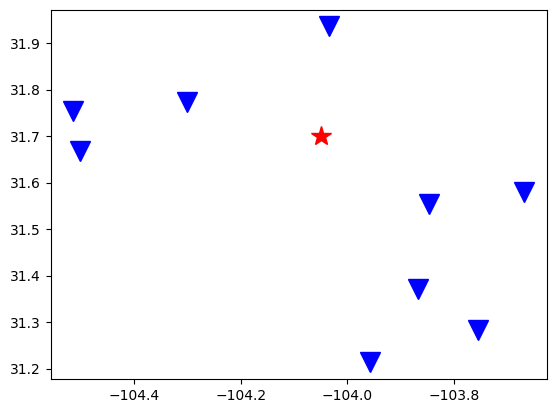

In [8]:
plt.plot(lons,lats,'v',color='b',markersize=15)
plt.plot(evlon,evlat,'*',color='r',markersize=15)

In [9]:
#load synthetic traveltimes
import numpy as np

evfile='./smalldata/locations_10000.txt'

f=open(evfile,'r');
evlabels=[line.rstrip("\n").split(" ") for line in f.readlines()];
evlabels=np.array(evlabels,dtype='float32').transpose()

nevent=evlabels.shape[1];



/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:160: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:165: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:170: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


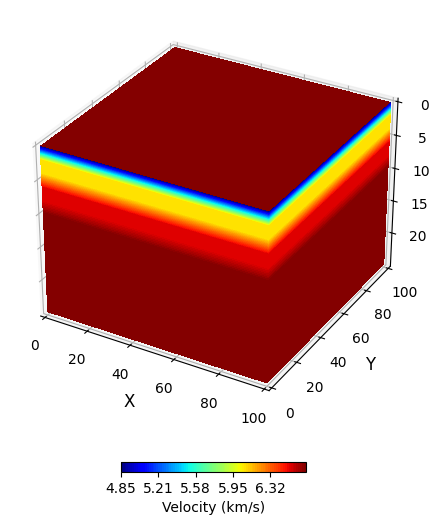

In [10]:

from pyseistr import asciiread,asciiwrite
import matplotlib.pyplot as plt
from pyseistr import plot3d

vels=asciiread('smalldata/WTexas_vp.txt');
z=[float(ii.split()[0]) for ii in vels];
vel=[float(ii.split()[1]) for ii in vels];

nz=101;nx=101;ny=101;dx=1.0;dy=1.0;dz=z[1]-z[0];


vp=np.zeros([nz,nx,ny]);
for ii in range(nx):
    for jj in range(ny):
        vp[:,ii,jj]=np.array(vel);


plot3d(vp,cmap='jet',x=np.array(range(nx))*dx,y=np.array(range(ny))*dy,z=np.array(range(nz))*dz,barlabel='Velocity (km/s)')

In [11]:
evlabels.shape

(3, 10000)

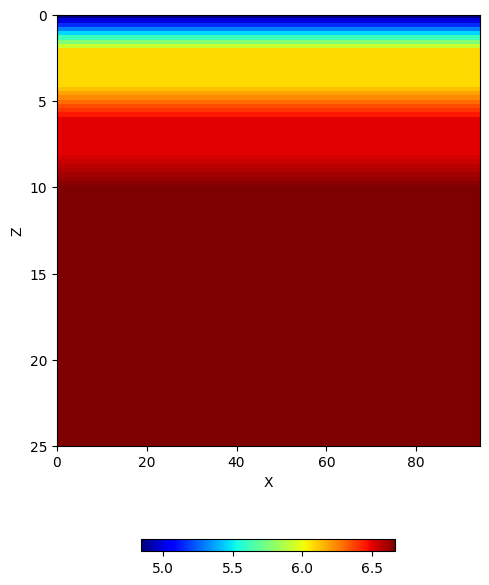

In [12]:
# using pyekfmm

# vfile='/Users/chenyk/chenyk/eqsource_ml/db1d_syn9_v2/vpmod.bin';

# fd = open(vfile,'rb')
# vp = np.fromfile(fd, dtype = np.float32) #synthetic time
# vp=vp.reshape([101,101,101],order='F'); #zxy

ii=50
fig = plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
ax=plt.imshow(vp[:,:,ii],extent=[minx,maxx,25,0],aspect='auto');
plt.jet();
plt.xlabel('X');plt.ylabel('Z');
plt.colorbar(orientation='horizontal',shrink=0.6);


In [13]:
shots=evlabels.transpose()
shots[-5:,:]

array([[47.065 ,  0.8031,  2.25  ],
       [53.6541, 57.0201, 15.    ],
       [ 0.    , 61.8387,  4.25  ],
       [90.3648, 19.2744, 12.5   ],
       [75.304 , 74.6883,  9.5   ]], dtype=float32)

In [14]:
shots[0:3,:]


array([[42.3585, 47.3829,  3.25  ],
       [93.1887, 14.4558,  2.75  ],
       [57.4193,  3.2124, 19.5   ]], dtype=float32)

In [ ]:
import pyekfmm as fmm

vel=np.swapaxes(vp,0,2).reshape([101*101*101,1],order='F'); #transpose to [xyz]
# t=fmm.eikonal_surf(vel,xyz=shots[0:4],ax=[0,0.9413,101],ay=[0,0.8031,101],az=[0,0.25,101],order=1) #xy-nevets 
# fmmtime=t.reshape(101,101,nevent,order='F'); #[x,y]
# memory issue stopped

fmmtimes=np.zeros([101,101,nevent],dtype='float32') #x,y,nevent
for ii in range(nevent):
    fmmtimes[:,:,ii]=fmm.eikonal_surf(vel,xyz=np.expand_dims(shots[ii,:],0),ay=[0,0.9413,101],ax=[0,0.8031,101],az=[0,0.25,101],order=1).reshape(101,101,order='F');
    #a little inconsistent here (due to C-version X-Y inconsistency)
    if np.mod(ii,50)==0:
        print('event id=',ii,' is done\n');


event id= 0  is done

event id= 50  is done



In [ ]:
nn=252;
a=np.array_equal(stimes[:,:,0:nn],fmmtimes[:,:,0:nn]);
print("Calculation result correct? ",a)

In [ ]:
# np.array_equal(stimes[:,:,253:],fmmtimes[:,:,253:])
stimes[:,:,nn]

In [ ]:
# fmmtimes[:,:,nn]

In [ ]:
fmmtimes[:,:,:].max()

In [ ]:
stimes[:,:,:].max()

In [ ]:
ii=252
print(evlabels[:,ii])
evlabels_deg=evlabels.copy();
evlabels_deg[0,ii]=minlon+evlabels_deg[0,ii]/111.1949
evlabels_deg[1,ii]=minlat+evlabels_deg[1,ii]/111.1949

## coordinates transformation
lons_x=(np.array(lons)-minlon)*111.1949 #station longitudes in X
lats_y=(np.array(lats)-minlat)*111.1949 #station latitudes in Y
print(lons_x)
print(lats_y)
evlon_x=(evlon-minlon)*111.1949
evlat_y=(evlat-minlat)*111.1949

fig = plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
ax=plt.imshow(stimes[:,:,ii].T,extent=[minx,maxx,maxy,miny]);
plt.gca().invert_yaxis()
plt.jet();
plt.xlabel('X');plt.ylabel('Y');
plt.plot(evlabels[0,ii],evlabels[1,ii],'*',color='g',markersize=12)
plt.colorbar(orientation='horizontal',shrink=0.6);
plt.plot(lons_x,lats_y,'v',color='b',markersize=15)
plt.plot(evlon_x,evlat_y,'*',color='r',markersize=15)

plt.subplot(2,2,2)
ax=plt.imshow(stimes[:,:,ii].T,extent=[minlon,maxlon,maxlat,minlat]);
plt.gca().invert_yaxis()
plt.xlabel('Lon');plt.ylabel('Lat');
plt.plot(evlabels_deg[0,ii],evlabels_deg[1,ii],'*',color='g',markersize=12)
plt.colorbar(orientation='horizontal',shrink=0.6);
plt.plot(lons,lats,'v',color='b',markersize=15)
plt.plot(evlon,evlat,'*',color='r',markersize=15)

plt.subplot(2,2,3)
ax=plt.imshow(fmmtimes[:,:,ii].T,extent=[minx,maxx,maxy,miny]);
plt.gca().invert_yaxis()
plt.jet();
plt.xlabel('X');plt.ylabel('Y');
plt.plot(evlabels[0,ii],evlabels[1,ii],'*',color='g',markersize=12)
plt.colorbar(orientation='horizontal',shrink=0.6);
plt.plot(lons_x,lats_y,'v',color='b',markersize=15)
plt.plot(evlon_x,evlat_y,'*',color='r',markersize=15)

plt.subplot(2,2,4)
ax=plt.imshow(stimes[:,:,ii].T-fmmtimes[:,:,ii].T,extent=[minlon,maxlon,maxlat,minlat]);
plt.gca().invert_yaxis()
plt.xlabel('Lon');plt.ylabel('Lat');
plt.plot(evlabels_deg[0,ii],evlabels_deg[1,ii],'*',color='g',markersize=12)
plt.colorbar(orientation='horizontal',shrink=0.6);
plt.plot(lons,lats,'v',color='b',markersize=15)
plt.plot(evlon,evlat,'*',color='r',markersize=15)

In [ ]:
#from here, using 
stimes=fmmtimes;

In [ ]:
minx,maxx,maxy,miny

In [ ]:
evlabels_deg[0,ii],evlabels_deg[1,ii]

In [ ]:
## prepare training data
print(lons_x)
print(lats_y)
dx=(maxx-minx)/100;
dy=(maxy-miny)/100;
dz=0.25
print(dx,dy)

indx=np.int16(lons_x/dx)
indy=np.int16(lats_y/dy)
print(indx)
print(indy)

lons_x2=indx*dx
lats_y2=indy*dy
data=np.zeros([3,nsta,nevent])
for ii in range(nevent):
    for jj in range(nsta):
        data[0,jj,ii]=lons_x2[jj] #use grid position
        data[1,jj,ii]=lats_y2[jj] #use grid position
        data[2,jj,ii]=stimes[indx[jj],indy[jj],ii]

In [ ]:
data[:,:,1]

In [ ]:
for ii in range(nevent):
    ind=np.argsort(data[2,:,ii])
    data[:,:,ii]=data[:,ind,ii]

In [ ]:
data[:,:,1]

In [ ]:
stimes[89,9,1]

In [ ]:
evlabels[:,2]

In [ ]:
print(data[2,1,1]) #simple verification
print(data.shape)

In [ ]:
## label 
lab = evlabels
lab.shape
lab[:,1]

In [ ]:
# import h5py
# import scipy.io
# import numpy as np

# #mat = scipy.io.loadmat(r'D:\Research\MicroseismicLocation\Matlab\ml_source_train_10000.mat')
# mat = scipy.io.loadmat(r'/Users/chenyk/chenyk/texnet/traveltime/ml_source4/ml_source_train_100000_weiyuan4.mat')
# data = mat['data222']
# lab = mat['label_location']
# np.shape(data)
# (3, 38, 100000)

In [ ]:
import h5py

# Reading Input Lat and Long for the Stations and Events.
lat=[]
long=[]
timdif=[]
laball=[]
loc=[]
depall=[]
lad = []
lod = []
for i in range(0,np.shape(data)[-1]):
    # Time difference betweeen the first arrival time and the 9 stations.
    t = data[2,:,i] - data[2,0,i] 
    t = t[1:]
    timdif.append(t)
    
    # The target is the difference between the lat/long of the first station 
    # and the excat lat/long of the event. The depth is the excat value.
    lad.append(lab[0,i] - data[0,0,i])
    lod.append(lab[1,i] - data[1,0,i])
    
    # The lat/long of the 10 stations
    lat.append(data[0,:,i])
    long.append(data[1,:,i])
    
    
    # The lat/long and depth of the events.
    laball.append(lab[:,i])
    depall.append(lab[2,i])
    
lat    = np.array(lat)
long   = np.array(long)
timdif = np.array(timdif)
laball = np.array(laball)
depall = np.array(depall)
lad = np.array(lad)
lod = np.array(lod)

lad    = np.reshape(lad,(lad.shape[0],1))
lod   = np.reshape(lod,(lod.shape[0],1))
depall = np.reshape(depall,(depall.shape[0],1))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Concatenating the input features.
p_all = np.concatenate([lat,long,timdif],axis=-1)

# We randomly split the data, so I saved the random index for reproducing and comparing.
np.random.seed(2021)
indrand=np.random.permutation(nevent)

# Reorder according to the randomaization.
p_all = p_all[indrand]
d = np.concatenate([lad,lod,depall],axis=-1) 
d = d[indrand]

np.shape(p_all)

In [ ]:
# Training RF using 90% of the data.
#regr = RandomForestRegressor(max_depth=100,random_state=0,verbose=1,criterion='mse',n_jobs=-1)
regr = RandomForestRegressor(max_depth=1000,max_features=26,n_estimators=1000,oob_score=False,random_state=43,verbose=1,criterion='mse',n_jobs=-1)

ix = int(len(p_all)*0.9)
regr.fit(p_all[0:ix],d[0:ix])  


In [ ]:
# Save the model
# import joblib
# joblib.dump(regr, 'model.joblib') 


In [ ]:
# train result

# Predicting the difference lat/long and excat depth.
outtrain = regr.predict(p_all[0:ix])

# Retriving the excat lat/long
outtrain[:,0] = data[0,0,indrand][0:ix] + outtrain[:,0]
outtrain[:,1] = data[1,0,indrand][0:ix] + outtrain[:,1]
dx = laball[indrand][0:ix]

# Error estimatin (MAE)
errlattrain  = np.mean(np.abs( (outtrain[:,0]) - (dx[:,0]) ))
errlongtrain = np.mean(np.abs( (outtrain[:,1]) - (dx[:,1]) ))
errsepthtrain = np.mean(np.abs( (outtrain[:,2]) - (dx[:,2]) ))


errlattrain,errlongtrain,errsepthtrain

In [ ]:
print('dx,dy,dz=',0.9413,0.8031,0.25) ##comparison with model resolution

In [ ]:
p_all[0:ix].shape

In [ ]:
times

In [ ]:
times=np.array(times)

In [ ]:
times-times[0]

In [ ]:
lons_x.shape

In [ ]:
lats_y.shape

In [ ]:
# test the robustness
# times[6]=0
# times[7]=16
# times[8]=16

In [ ]:
inds=np.argsort(times)
times=times[inds]
lons_x=lons_x[inds]
lats_y=lats_y[inds]


In [ ]:
t_all = np.concatenate([lons_x,lats_y,times[1:]-times[0]],axis=-1) #here use grid positions of stations

In [ ]:
np.concatenate([lons_x,lats_y,times],axis=-1)

In [ ]:
t_all.shape

In [ ]:
t_all

In [ ]:
p_all[1]

In [ ]:
p_all.shape

In [ ]:
t_all.shape

In [ ]:
t_all=np.expand_dims(t_all, axis=0)
t_all.shape

In [ ]:
# load independently trained model
# import joblib
# regr = joblib.load('../../db1d_syn9_v2/model.joblib')

In [ ]:
# test result

# Predicting the difference lat/long and excat depth.
outtest_xy = regr.predict(t_all)

# Retriving the excat lat/long
outtest_xy[:,0] = lons_x[0] + outtest_xy[:,0] #use grid positions of stations (after binning)
outtest_xy[:,1] = lats_y[0] + outtest_xy[:,1] #use grid positions of stations (after binning)

outtest=outtest_xy
outtest[:,0]=minlon+outtest[:,0]/111.1949
outtest[:,1]=minlat+outtest[:,1]/111.1949

print(outtest)
print('Predicted',outtest[:,0],outtest[:,1],outtest[:,2])
print('catalog:',-104.05,31.7,7.1)

In [ ]:
plt.plot(lons,lats,'v',color='b',markersize=15)
plt.plot(evlon,evlat,'*',color='r',markersize=15)
plt.plot(outtest[:,0],outtest[:,1],'p',color='g',markersize=15)